In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
diabetes = datasets.load_diabetes()

In [3]:
# print(list(diabetes))
# print(diabetes['DESCR'])

In [4]:
df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
print(df.shape)
df

(442, 10)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [5]:
draft = df = df[['bmi', 's1', 's2', 's3', 's4', 's5', 's6']]

In [6]:
cp = draft

In [7]:
df.columns

Index(['bmi', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

---
- **UTILISER BOXPLOT DEPUS PANDAS POUR DETECTER LES VALEURS ABERRANTES(OUTLIERS)**

---
- VERIFIER LA PRESENCE DES OUTLIERS

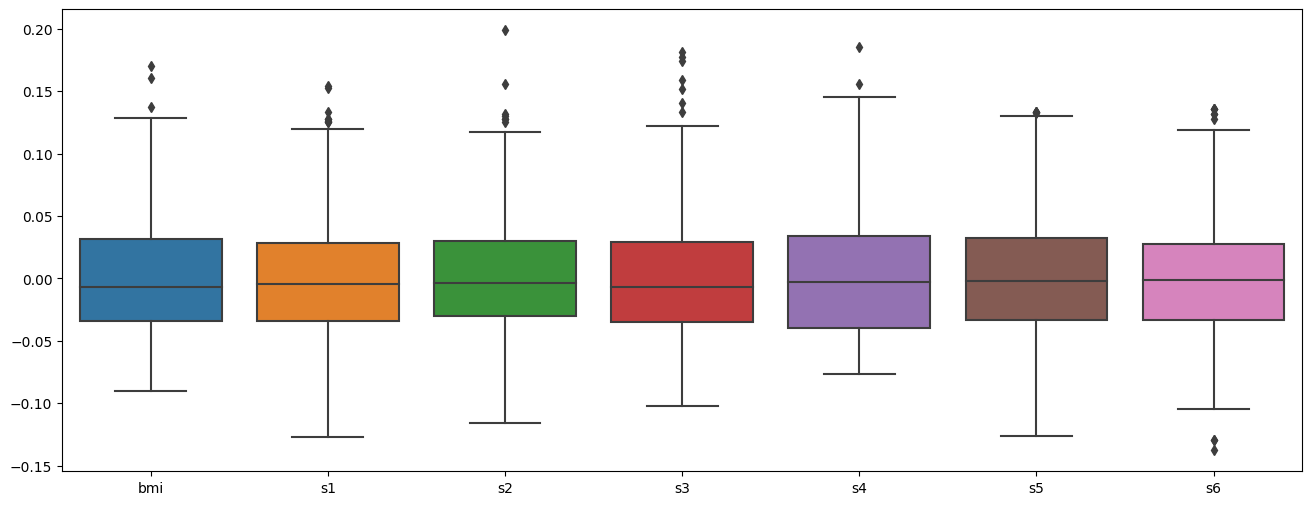

In [10]:
plt.figure(figsize = (16,6))
sns.boxplot(data = df)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   bmi     442 non-null    float64
 1   s1      442 non-null    float64
 2   s2      442 non-null    float64
 3   s3      442 non-null    float64
 4   s4      442 non-null    float64
 5   s5      442 non-null    float64
 6   s6      442 non-null    float64
dtypes: float64(7)
memory usage: 24.3 KB


In [13]:
draft = df = df[['bmi', 's1', 's2', 's3', 's4', 's5', 's6']]

**SUPPRESSION DES VALEURS ABERRANTES**

In [17]:
def drop_outliers(df, colname):
    Q1 = np.percentile(df[colname], 25)
    Q3 = np.percentile(df[colname], 75)
    limit = 1.5*(Q3 - Q1)
    
    df.drop(df[df[colname] > (limit + Q3)].index, inplace = True)
    df.drop(df[df[colname] < (Q1 - limit)].index, inplace = True)

In [18]:
for colname in draft.columns:
    drop_outliers(draft, colname)

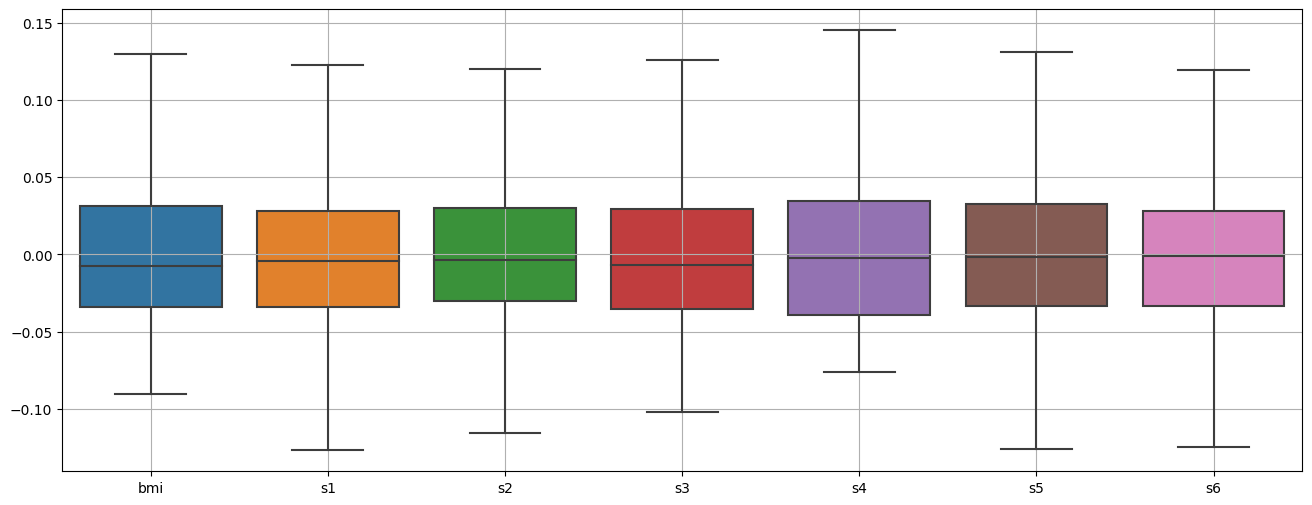

In [19]:
plt.figure(figsize = (16,6))
sns.boxplot(data = draft)
plt.grid()
plt.show()

---
# Standardisation

#  $$x' = \frac{x_{i} - \mu}{\sigma}$$

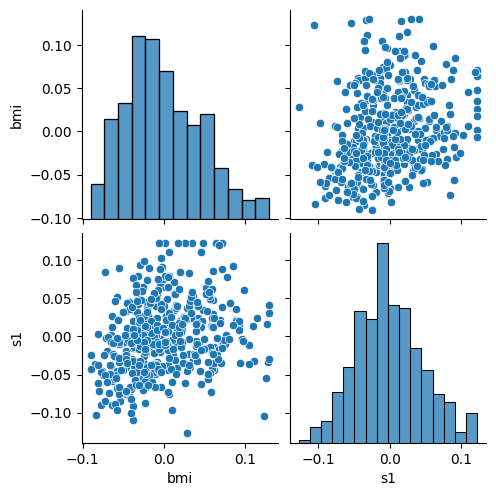

In [97]:
sns.pairplot(data = draft[['bmi', 's1']])
plt.show()

In [106]:
draft[['bmi', 's1']].describe()


,bmi,s1
count,442.000000,442.000000
mean,-0.000181,-0.000212
std,0.047056,0.047019
min,-0.090275,-0.126781
25%,-0.034229,-0.034248
50%,-0.007284,-0.004321
75%,0.031248,0.028358
max,0.129464,0.122267


In [105]:
sts = pd.DataFrame(StandardScaler().fit_transform(draft), columns = draft.columns)
sts[['bmi', 's1']].describe()

,bmi,s1
count,4.420000e+02,4.420000e+02
mean,2.009453e-18,1.607563e-17
std,1.001133e+00,1.001133e+00
min,-1.916776e+00,-2.694903e+00
25%,-7.243754e-01,-7.246967e-01
50%,-1.511058e-01,-8.749254e-02
75%,6.686696e-01,6.083051e-01
max,2.758237e+00,2.607808e+00


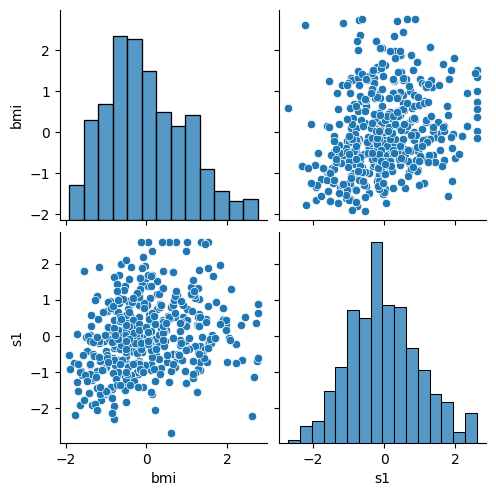

In [103]:
sns.pairplot(data = sts[['bmi', 's1']])
plt.show()

---
- *GENERER DES DONNEES ALEATOIRES*

In [72]:
def get_data(nblines = 1000, nbcols = 6, namecols = list('ABCDEF')):
    df = pd.DataFrame(np.random.randn(nblines, nbcols), columns = namecols)
    return df

In [73]:
df = get_data()

print(df.shape)
df.head()

(1000, 6)


,A,B,C,D,E,F
0,1.169230,-1.483675,-0.261471,-1.032865,-1.033913,-2.728514
1,0.017987,-0.952100,-0.269850,0.309677,-0.532257,1.109950
2,0.215162,0.290908,-0.567018,-1.038676,-1.180653,1.468891
3,1.041620,-0.179878,-0.510389,1.298588,1.150894,-1.576565
4,1.707225,-0.882948,0.080729,-1.316194,0.317941,-0.454219


<Figure size 400x200 with 0 Axes>

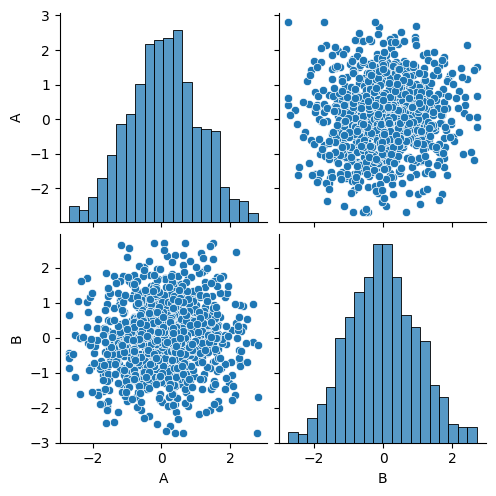

In [76]:
plt.figure(figsize=(4, 2))
sns.pairplot(data = df[['A', 'B']]);


In [80]:
df.describe()

,A,B,C,D,E,F
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.062557,-0.013943,0.011703,-0.048283,0.031646,-0.013578
std,1.026672,0.995064,1.036212,1.006760,0.991031,1.003677
min,-2.688756,-2.733943,-2.764461,-2.753087,-2.796051,-2.604261
25%,-0.628828,-0.696844,-0.641000,-0.705832,-0.679656,-0.674480
50%,0.075013,-0.029775,-0.021261,-0.055993,0.025701,-0.033115
75%,0.744457,0.661223,0.774640,0.659005,0.731274,0.612041
max,2.804385,2.698323,2.898100,2.706260,2.847668,2.541822


<Figure size 200x200 with 0 Axes>

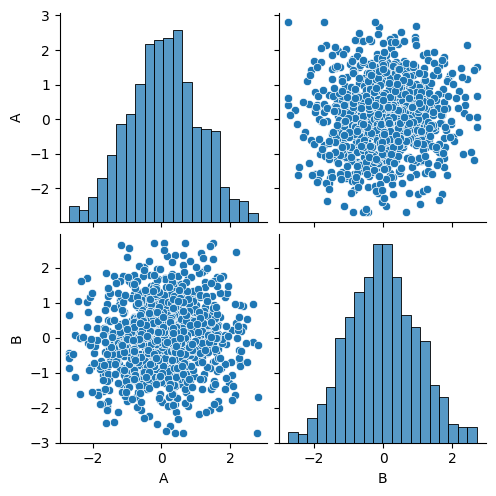

In [81]:
plt.figure(figsize=(2, 2))
sns.pairplot(data = df[['A','B']])
plt.show()

---
# Normalisation
#  $x' = \frac{x - x_{min}}{x_{max} - x_{min}}$

In [65]:
scaled_data = pd.DataFrame(MinMaxScaler().fit_transform(df), columns = df.columns)

<Figure size 200x200 with 0 Axes>

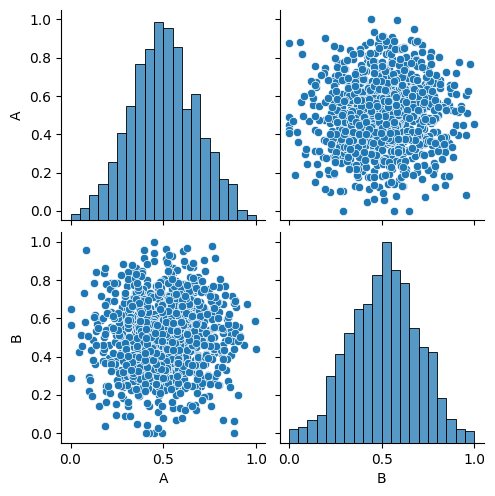

In [71]:
plt.figure(figsize=(2, 2))
sns.pairplot(data = scaled_data[['A','B']])
plt.show()

In [67]:
scaled_data.describe()

,A,B,C,D,E,F
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.500940,0.511887,0.499872,0.501710,0.494886,0.503797
std,0.180189,0.185453,0.176835,0.189815,0.187053,0.182668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.375000,0.382517,0.375000,0.375000,0.375000,0.375000
50%,0.494858,0.516306,0.496599,0.502594,0.490993,0.501584
75%,0.625000,0.637528,0.625000,0.625000,0.625000,0.625000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [110]:
import numpy as np

data = np.random.normal(loc=0, scale=1, size=(100, 4))
df = pd.DataFrame(data)
df

,0,1,2,3
0,0.505141,0.862444,0.033879,-0.091940
1,0.086586,0.242865,-0.467533,0.340241
2,2.011462,0.899075,0.574776,-1.566404
3,0.236462,2.215818,0.137410,-0.645322
4,1.250763,-1.156948,-0.252615,0.111636
...,...,...,...,...
95,-0.502007,0.356851,2.549534,-0.522690
96,1.370459,-1.017484,-0.915350,-0.458443
97,-0.685799,-0.420533,-2.654705,-0.368691
98,2.598609,2.160149,-0.832129,-0.237480
